###Тестирование этап 1

In [ ]:
import pandas as pd

In [ ]:
data_routes = pd.read_csv('/content/generated_routes_202505261154.csv')

In [ ]:
data_routes.head(1)

,id,session_id,user_description,user_query,k,artworks,created_route,created_at
0,1,6ea4bd74-ec18-43ac-b933-f03cb6727dec,fsfgs,ываава,9,"{NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL}",1. Александра Жернова\n«Туменова София Ермаков...,2025-05-11 18:37:02.967


Аналитика по маршрутам первого теста

Самое частое количество экспонатов в экскурсии

In [ ]:
most_common = data_routes['k'].value_counts().idxmax()
print(f'most common k: {most_common}')

most common k: 6


Медиана количества экспонатов в экскурсии

In [ ]:
median_k = data_routes['k'].median()
print(f'Median k: {median_k}')

Median k: 7.0


Описание экспонатов

In [ ]:
data_artwork_info = pd.read_csv('/content/generated_artwork_info_202505261153.csv')

In [ ]:
data_artwork_info.head(2)

,id,session_id,artwork,user_description,generated_text,voice_filename,generation_time_text_sec,generation_time_audio_sec,created_at
0,1,94316f2a-726a-413a-87d6-70fcc0f1f4f3,"Василий Кирилов\n""Автопортрет 2""",dfgdfg,"ВАСИЛИЙ КИРИЛЛОВ\nВыпускник ТГУ, молодой худож...",voice.ogg,1,4,2025-05-12 10:05:38.405
1,2,94316f2a-726a-413a-87d6-70fcc0f1f4f3,"Александр Кузьмин\n""Улица знакомая""",dfgdfg,АЛЕКСАНДР КУЗЬМИН\nМультидисциплинарный художн...,voice.ogg,1,5,2025-05-12 10:05:51.596


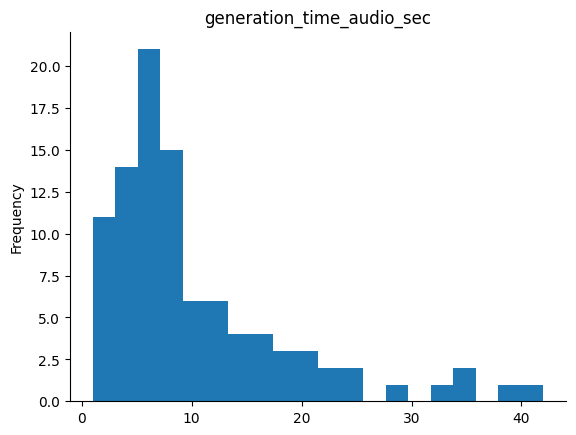

In [ ]:
# @title generation_time_audio_sec

from matplotlib import pyplot as plt
data_artwork_info['generation_time_audio_sec'].plot(kind='hist', bins=20, title='generation_time_audio_sec')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import numpy as np

# Убираем пропуски, если есть
col = data_artwork_info['generation_time_audio_sec'].dropna()

# Среднее (μ) и стандартное отклонение (σ)
mean = col.mean()
std = col.std()

# Стандартный диапазон: [μ - σ, μ + σ]
lower_bound = mean - std
upper_bound = mean + std

print(f"Среднее: {mean:.2f}")
print(f"Стандартное отклонение: {std:.2f}")
print(f"Стандартный диапазон: от {lower_bound:.2f} до {upper_bound:.2f}")


Среднее: 10.73
Стандартное отклонение: 8.35
Стандартный диапазон: от 2.38 до 19.08


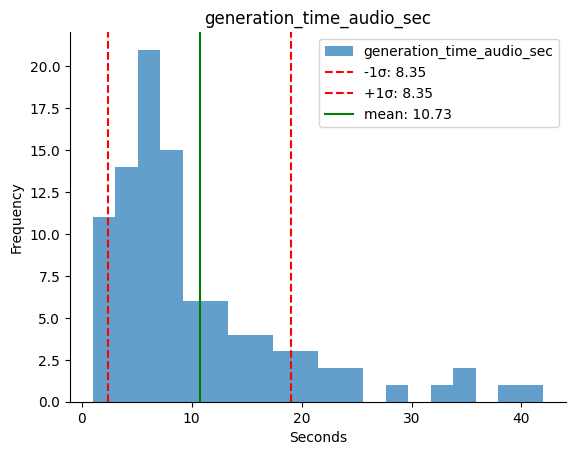

In [ ]:
col.plot(kind='hist', bins=20, title='generation_time_audio_sec', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'-1σ: {std:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'+1σ: {std:.2f}')
plt.axvline(mean, color='green', linestyle='-', label=f'mean: {mean:.2f}')

plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Seconds')
plt.show()

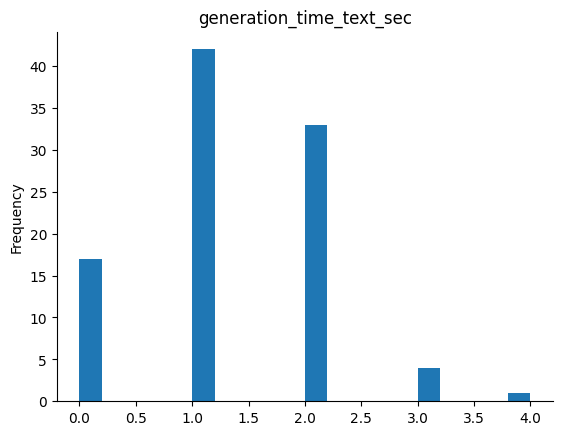

In [ ]:
# @title generation_time_text_sec

from matplotlib import pyplot as plt
data_artwork_info['generation_time_text_sec'].plot(kind='hist', bins=20, title='generation_time_text_sec')
plt.gca().spines[['top', 'right',]].set_visible(False)

Выбросы во времени генерации аудио к описанию экспонатов

In [ ]:
import pandas as pd

# Расчёт IQR
Q1 = data_artwork_info['generation_time_audio_sec'].quantile(0.25)
Q3 = data_artwork_info['generation_time_audio_sec'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Логическая маска
outlier_mask = (data_artwork_info['generation_time_audio_sec'] < lower_bound) | (data_artwork_info['generation_time_audio_sec'] > upper_bound)

# Вывести строки с выбросами
outliers = data_artwork_info[outlier_mask]

print("Строки с выбросами:")
for _, row in outliers.iterrows():
    print(row['generated_text'])
    print(row['generation_time_audio_sec'])
    print(f'----------'*10)



Строки с выбросами:
Максим Родионов 

В проекте «Культурный слой» фигурируют три экспериментальные картины, по ним мы можем наблюдать как меняется техника художника в периоде последних 4-х лет.

«Сны музыканта»
Техника: холст, масло
2021

Эта работа на грани реальности и сна, именно этот момент стал основной линией картины. Она буквально пронизывает всё пространство холста звуком отсутствующих струн. Символический ряд картины, частично приснившийся художнику во сне, задаёт драматическую атмосферу холста. 

«Мираж»

Техника: холст, масло
2022

Как бы взглядом на себя извне можно рассматривать эту картину. Это персонаж за стеклом. На самом деле реален только он сам, а в остальном это лишь отраженная реальность. Реальность видит только персонаж, а мы, зрители, видим его через эту отражённую реальность как бы из-за стекла, но работа больше о человеке взаперти своих собственных иллюзий.

«Источник»

Техника: холст, масло
2024

 «Источник» – наверное, единственная работа из представленных, в

In [ ]:
data_artwork_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         97 non-null     int64 
 1   session_id                 97 non-null     object
 2   artwork                    97 non-null     object
 3   user_description           97 non-null     object
 4   generated_text             97 non-null     object
 5   voice_filename             97 non-null     object
 6   generation_time_text_sec   97 non-null     int64 
 7   generation_time_audio_sec  97 non-null     int64 
 8   created_at                 97 non-null     object
dtypes: int64(3), object(6)
memory usage: 6.9+ KB


Ответы на вопросы

In [ ]:
data_QA = pd.read_csv('/content/generated_answers_202505261153.csv')


In [ ]:
data_QA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         57 non-null     int64  
 1   session_id                 57 non-null     object 
 2   user_question              57 non-null     object 
 3   user_description           57 non-null     object 
 4   artwork                    57 non-null     object 
 5   generated_answer           57 non-null     object 
 6   voice_filename             39 non-null     object 
 7   generation_time_text_sec   39 non-null     float64
 8   generation_time_audio_sec  39 non-null     float64
 9   created_at                 57 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.6+ KB


In [ ]:
data_QA.head(2)

,id,session_id,user_question,user_description,artwork,generated_answer,voice_filename,generation_time_text_sec,generation_time_audio_sec,created_at
0,1,662f2912-82e4-48a7-ba7e-9bf0a925462d,rfr ltdf,fgsg,Евгений Проводенко \n«Монолит»,Описание видеоарта Евгения Проводенко Монолит ...,voice.ogg,0.0,9.0,2025-05-12 09:54:46.804
1,2,662f2912-82e4-48a7-ba7e-9bf0a925462d,как дела,fgsg,Евгений Проводенко \n«Монолит»,"К сожалению, я затрудняюсь ответить. Пожалуйст...",NaN,NaN,NaN,2025-05-12 09:55:11.015


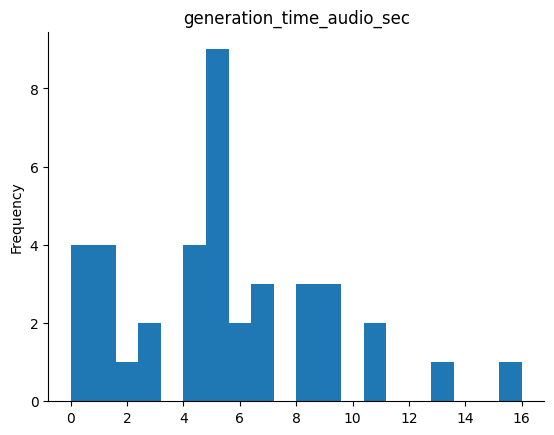

In [ ]:
# @title generation_time_audio_sec

from matplotlib import pyplot as plt
data_QA['generation_time_audio_sec'].plot(kind='hist', bins=20, title='generation_time_audio_sec')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import numpy as np

# Убираем пропуски, если есть
col = data_QA['generation_time_audio_sec'].dropna()

# Среднее (μ) и стандартное отклонение (σ)
mean = col.mean()
std = col.std()

# Стандартный диапазон: [μ - σ, μ + σ]
lower_bound = mean - std
upper_bound = mean + std

print(f"Среднее: {mean:.2f}")
print(f"Стандартное отклонение: {std:.2f}")
print(f"Стандартный диапазон: от {lower_bound:.2f} до {upper_bound:.2f}")


Среднее: 5.33
Стандартное отклонение: 3.72
Стандартный диапазон: от 1.61 до 9.06


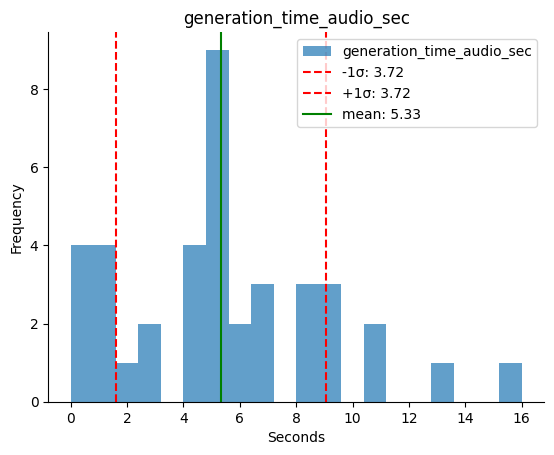

In [ ]:
col.plot(kind='hist', bins=20, title='generation_time_audio_sec', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'-1σ: {std:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'+1σ: {std:.2f}')
plt.axvline(mean, color='green', linestyle='-', label=f'mean: {mean:.2f}')

plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Seconds')
plt.show()


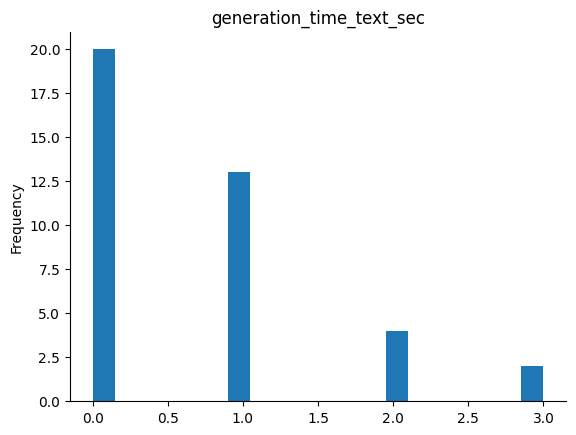

In [ ]:
# @title generation_time_text_sec

from matplotlib import pyplot as plt
data_QA['generation_time_text_sec'].plot(kind='hist', bins=20, title='generation_time_text_sec')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Условие: где audio_time is None, но text_time != 0
violations = data_QA[
    data_QA['generation_time_audio_sec'].isna() &
    (data_QA['generation_time_text_sec'] != None)
]

# Вывод
if not violations.empty:
    print("Есть строки, нарушающие правило:")
    print(violations)
else:
    print("Правило соблюдается во всех строках.")


Есть строки, нарушающие правило:
     id                            session_id  \
1     2  662f2912-82e4-48a7-ba7e-9bf0a925462d   
3    36  d1d48dd5-a9e5-46ef-bf2f-fb0c0222dd43   
4    37  d1d48dd5-a9e5-46ef-bf2f-fb0c0222dd43   
7    40  d1d48dd5-a9e5-46ef-bf2f-fb0c0222dd43   
11   44  ed9523f7-618c-4875-adab-e4dd745cbcaf   
12  142  00712c4e-1dca-4d76-9d78-f9afe7a2fb82   
14   46  ed9523f7-618c-4875-adab-e4dd745cbcaf   
18   50  ed9523f7-618c-4875-adab-e4dd745cbcaf   
22  175  22d295aa-9f54-46cb-8cd6-8324ebe09a76   
25   56  3c9f3d1b-fba7-47f2-8b84-1e28b15ecc19   
29   60  ed9523f7-618c-4875-adab-e4dd745cbcaf   
30   61  ed9523f7-618c-4875-adab-e4dd745cbcaf   
35   65  ed9523f7-618c-4875-adab-e4dd745cbcaf   
36   66  ed9523f7-618c-4875-adab-e4dd745cbcaf   
44   74  01858086-24ed-48bf-a071-1b21d1d0981e   
47  139  488acac1-f5a0-457d-8491-00e0b040d1df   
49  141  488acac1-f5a0-457d-8491-00e0b040d1df   
55  214  c11d80b1-5fd0-4c96-9428-4d5aa382f00e   

                                   

In [ ]:
Q1 = data_QA['generation_time_audio_sec'].quantile(0.25)
Q3 = data_QA['generation_time_audio_sec'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Логическая маска
outlier_mask = (data_QA['generation_time_audio_sec'] < lower_bound) | (data_QA['generation_time_audio_sec'] > upper_bound)

# Вывести строки с выбросами
outliers = data_QA[outlier_mask]

print("Строки с выбросами:")
for _, row in outliers.iterrows():
    print(row)
    print(row['generated_answer'])
    print(row['generation_time_audio_sec'])
    print(f'----------'*10)


Строки с выбросами:
id                                                                          53
session_id                                3c9f3d1b-fba7-47f2-8b84-1e28b15ecc19
user_question                                     Расскажи про начальную карту
user_description             Мне 22. Увлекаюсь много чем, но сейчас в основ...
artwork                         Александра Жернова\n«Туменова София Ермаковна»
generated_answer             Начнём с того, что создание карты  это не прос...
voice_filename                                                       voice.ogg
generation_time_text_sec                                                   1.0
generation_time_audio_sec                                                 16.0
created_at                                             2025-05-13 08:57:32.597
Name: 21, dtype: object
Начнём с того, что создание карты  это не просто описание местности, а глубокий анализ, включающий мифы, исторические факты и личные особенности. Работая над этим про

In [ ]:
data_goodbye = pd.read_csv('/content/generated_goodbye_202505261154.csv')
data_goodbye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        26 non-null     int64 
 1   session_id                26 non-null     object
 2   user_description          26 non-null     object
 3   generated_goodbye_word    26 non-null     object
 4   generation_time_text_sec  26 non-null     int64 
 5   created_at                26 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.3+ KB


In [ ]:
data_goodbye.head()

,id,session_id,user_description,generated_goodbye_word,generation_time_text_sec,created_at
0,1,97e73706-f2ee-460d-8f16-8be5ce1101d8,"Привет, я Маша мне 5 лет, яя люблю сырные шари...",Благодарим вас за участие в экскурсии по выста...,0,2025-04-28 15:15:43.691
1,2,48222e3e-57fb-4bcd-b483-57523ac09ba8,dhjb,Благодарю вас за участие в экскурсии по выстав...,0,2025-04-28 15:16:30.883
2,4,68e4df88-9926-49ec-8f5f-3a1d146b3e23,ававав,Благодарю вас за участие в экскурсии по выстав...,0,2025-04-28 15:28:28.986
3,5,cb7cb961-6a2f-4e20-a0db-ecc749247a56,hjhfjdhfjd,Благодарю вас за участие в экскурсии по выстав...,0,2025-04-28 15:33:58.175
4,6,87792b3d-a20e-4fec-ad26-02211df28c42,fhfhfh,Благодарю вас за внимание к выставке «Культурн...,0,2025-04-28 15:34:26.847


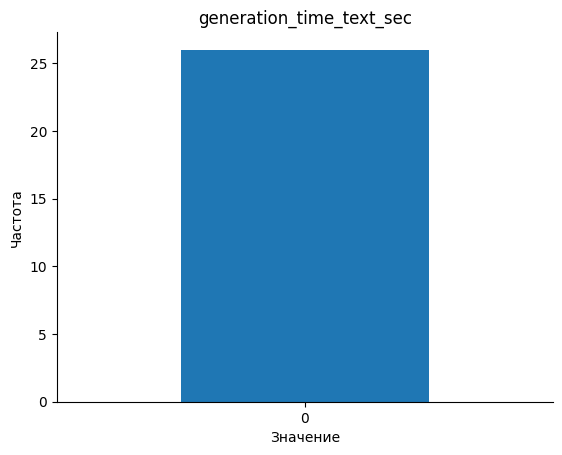

In [ ]:
ax = data_goodbye['generation_time_text_sec'].value_counts().plot(
    kind='bar', title='generation_time_text_sec'
)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # <-- Повернуть подписи

plt.show()


In [ ]:
value = data_goodbye['generation_time_text_sec'].iloc[0]
count = len(data_goodbye)
print(f"Все {count} значений равны {value}")

Все 26 значений равны 0


In [ ]:
data_start = pd.read_csv('/content/user_sessions_202505261154.csv')
data_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   session_id  93 non-null     object
 1   user_id     93 non-null     int64 
 2   username    93 non-null     object
 3   started_at  93 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.0+ KB


###Тестирование этап 2


In [ ]:
data_sessions_2 = pd.read_csv('/content/данные/user_sessions.csv')
data_sessions_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   session_id  208 non-null    object
 1   user_id     208 non-null    int64 
 2   username    208 non-null    object
 3   started_at  208 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.6+ KB


In [ ]:
data_sessions_2['username'].nunique()

84

In [ ]:
excluded_names = ['khapavochka', 'nellaleksanian']

data_sessions_2[~data_sessions_2['username'].isin(excluded_names)]['username'].nunique()


82

In [ ]:
data_routes_2 = pd.read_csv('/content/данные/generated_routes.csv')
data_routes_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                61 non-null     int64 
 1   session_id        61 non-null     object
 2   user_description  61 non-null     object
 3   user_query        61 non-null     object
 4   k                 61 non-null     int64 
 5   artworks          61 non-null     object
 6   created_route     61 non-null     object
 7   created_at        61 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.9+ KB


In [ ]:
data_routes_2.head()

,id,session_id,user_description,user_query,k,artworks,created_route,created_at
0,1,1ce63237-ec3a-4f10-8560-12bf0a86b43e,Ажйжаужп,В муру,5,"{""Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»...",1. Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА...,2025-05-13 11:36:45.973
1,3,3c4bbadb-e1be-43fc-99e8-e8c28e3d2842,Привет! \nЯ люблю живопись и музыку \nМне 45 лет,Современное искусство,14,"{""Гатауллина Диана\n\nТриптих “Под Никольским ...",1. Гатауллина Диана\n\nТриптих “Под Никольским...,2025-05-16 08:06:53.777
2,4,946a5f2b-38ec-40b4-a0a1-a4660386eb66,Люблю искусство. Учусь в художественной школе,Живопись 19 века,18,"{""Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»...",1. Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА...,2025-05-16 08:23:18.665
3,5,0337814a-de82-4149-84ee-b3dbc829219d,"мне 34, я работаю, но люблю котиков и читать:)...",мне очень грустно,23,"{""Никита Плеханов\n«Зеркало Истины»"",""Екатерин...",1. Никита Плеханов\n«Зеркало Истины»\n Экспона...,2025-05-16 14:27:42.826
4,7,56ba94f5-e4af-4267-94b5-f701938e1f6c,35,Картины,5,"{""Василий Кирилов\n\""Возле\"""",""Василий Кирилов...","1. Василий Кирилов\n""Возле""\n Экспонат на карт...",2025-05-16 14:32:00.076


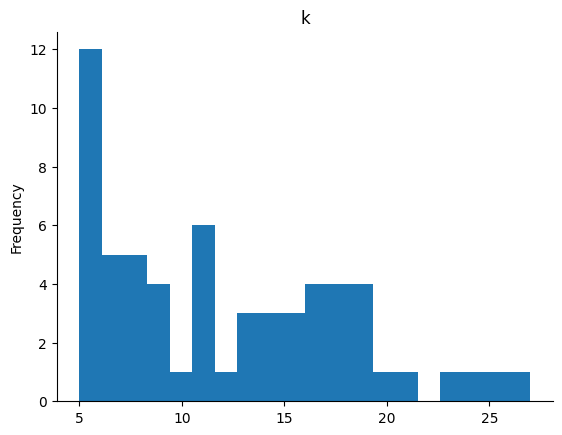

In [ ]:
# @title k

from matplotlib import pyplot as plt
data_routes_2['k'].plot(kind='hist', bins=20, title='k')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import numpy as np

# Убираем пропуски, если есть
col = data_routes_2['k'].dropna()

# Среднее (μ) и стандартное отклонение (σ)
mean = col.mean()
std = col.std()
mode = col.value_counts().idxmax()

# Стандартный диапазон: [μ - σ, μ + σ]
lower_bound = mean - std
upper_bound = mean + std

median = col.median()
print(f"Медиана: {median:.2f}")
print(f"Мода: {mode:.2f}")
print(f"Среднее: {mean:.2f}")
print(f"Стандартное отклонение: {std:.2f}")
print(f"Стандартный диапазон: от {lower_bound:.2f} до {upper_bound:.2f}")


Медиана: 11.00
Мода: 5.00
Среднее: 12.20
Стандартное отклонение: 5.83
Стандартный диапазон: от 6.37 до 18.03


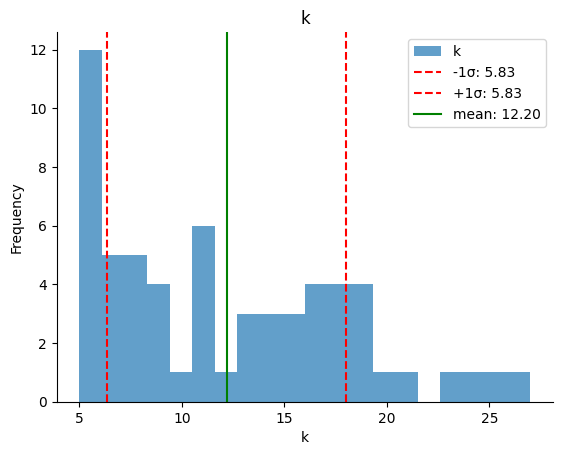

In [ ]:
col.plot(kind='hist', bins=20, title='k', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'-1σ: {std:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'+1σ: {std:.2f}')
plt.axvline(mean, color='green', linestyle='-', label=f'mean: {mean:.2f}')

plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('k')
plt.show()

Самый популярный экспонат

In [ ]:
data_artworks_2 = pd.read_csv('/content/данные/generated_artwork_info.csv')
data_artworks_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         234 non-null    int64 
 1   session_id                 234 non-null    object
 2   artwork                    234 non-null    object
 3   user_description           234 non-null    object
 4   generated_text             234 non-null    object
 5   voice_filename             234 non-null    object
 6   generation_time_text_sec   234 non-null    int64 
 7   generation_time_audio_sec  234 non-null    int64 
 8   created_at                 234 non-null    object
dtypes: int64(3), object(6)
memory usage: 16.6+ KB


In [ ]:
data_artworks_2.head()

,id,session_id,artwork,user_description,generated_text,voice_filename,generation_time_text_sec,generation_time_audio_sec,created_at
0,1,1ce63237-ec3a-4f10-8560-12bf0a86b43e,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Ажйжаужп,Эта экскурсия по галерее погружает вас в мир с...,voice.ogg,2,35,2025-05-13 11:37:35.660
1,2,3c4bbadb-e1be-43fc-99e8-e8c28e3d2842,Гатауллина Диана\n\nТриптих “Под Никольским мо...,Привет! \nЯ люблю живопись и музыку \nМне 45 лет,Диана Гатауллина приглашает вас в путешествие ...,voice.ogg,3,8,2025-05-16 08:07:21.589
2,3,946a5f2b-38ec-40b4-a0a1-a4660386eb66,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Люблю искусство. Учусь в художественной школе,**Первая сторона**\n\nАлександр Кузьмин создае...,voice.ogg,2,25,2025-05-16 08:23:52.641
3,4,946a5f2b-38ec-40b4-a0a1-a4660386eb66,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Люблю искусство. Учусь в художественной школе,"Представьте себе дом, но не обычный, а созданн...",voice.ogg,6,20,2025-05-16 08:25:35.097
4,5,c0b0ee0c-8090-43a9-b7db-c48c4babf8ac,Юлия Эдуардовна Миллер\n«Наследили»,Как дела?,Инсталляция Юлии Эдуардовны «Наследили» предст...,voice.ogg,1,11,2025-05-16 14:47:12.905


In [ ]:
# artwork_counts = data_artworks_2['artwork'].value_counts()
artwork_counts_df = data_artworks_2['artwork'].value_counts().reset_index()
artwork_counts_df.columns = ['artwork', 'count']
artwork_counts_df.to_csv('artwork_popularity.csv', index=False)

In [ ]:
artwork_counts_df = data_artworks_2['artwork'].value_counts().reset_index()
artwork_counts_df.columns = ['artwork', 'count']

In [ ]:
artwork_counts_df.head(12)

,artwork,count
0,Юлия Эдуардовна Миллер\n«Наследили»,17
1,Кристина Шилина\nСерия «Север»,13
2,Гатауллина Диана\n\nТриптих “Под Никольским мо...,10
3,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,10
4,Команда «ДАЙТЕ СТЕНУ»\n«Не дошла»,10
5,Артём Долгих\n«Минимальная монументальность ма...,10
6,"Кристина Бабина\n«Свет мой, зеркальце, скажи…»",10
7,Лада Ладная\n«Чего не знаю»,9
8,Диана Окаева\n«Дома лучше. Карта значимых мест»,9
9,"Эльвира Хусаинова \n«Там, только там»",8


In [ ]:
import numpy as np

# Убираем пропуски, если есть
col = data_artworks_2['generation_time_audio_sec'].dropna()

# Среднее (μ) и стандартное отклонение (σ)
mean = col.mean()
std = col.std()
mode = col.value_counts().idxmax()

# Стандартный диапазон: [μ - σ, μ + σ]
lower_bound = mean - std
upper_bound = mean + std

median = col.median()
print(f"Медиана: {median:.2f}")
print(f"Мода: {mode:.2f}")
print(f"Среднее: {mean:.2f}")
print(f"Стандартное отклонение: {std:.2f}")
print(f"Стандартный диапазон: от {lower_bound:.2f} до {upper_bound:.2f}")


Медиана: 10.00
Мода: 7.00
Среднее: 13.15
Стандартное отклонение: 7.84
Стандартный диапазон: от 5.31 до 20.98


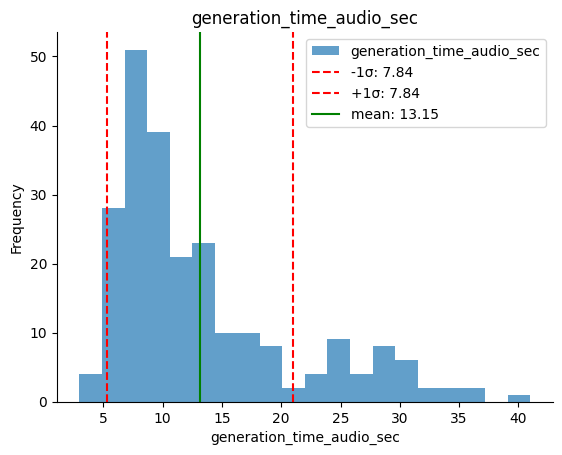

In [ ]:
col.plot(kind='hist', bins=20, title='generation_time_audio_sec', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'-1σ: {std:.2f}')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'+1σ: {std:.2f}')
plt.axvline(mean, color='green', linestyle='-', label=f'mean: {mean:.2f}')

plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('generation_time_audio_sec')
plt.show()

In [ ]:
import pandas as pd

# Расчёт IQR
Q1 = data_artworks_2['generation_time_audio_sec'].quantile(0.25)
Q3 = data_artworks_2['generation_time_audio_sec'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Логическая маска
outlier_mask = (data_artworks_2['generation_time_audio_sec'] < lower_bound) | (data_artworks_2['generation_time_audio_sec'] > upper_bound)

# Вывести строки с выбросами
outliers = data_artworks_2[outlier_mask]

print("Строки с выбросами:")
for _, row in outliers.iterrows():
    print(row['generated_text'])
    print(row['generation_time_audio_sec'])
    print(f'----------'*10)



Строки с выбросами:
Эта экскурсия по галерее погружает вас в мир современного искусства Тюмени, созданного мультидисциплинарной командой «Дайте Стену». Их проект — это эксперимент в искусстве, соединяющий традиционные ремесленные техники с новыми технологиями. На примере работы «Четыре стороны дома» можно увидеть, как художники исследуют различные аспекты городской среды и переносят их в пространство дома.

Каждая из четырех сторон этого проекта представляет собой уникальную интерпретацию городской культуры и повседневности. Например, первая сторона, выполненная Александром Кузьминым, демонстрирует вариативность шрифтовых композиций, вдохновленных народными мотивами и современным стрит-артом. Савелий Мельчаков наполняет вторую сторону тканью, превращая её в уютное укрытие, напоминающее детское убежище. Третья сторона, работа Василия Кирилова, фокусируется на архитектурном наследии советского периода, передавая ощущение надежности и долговечности. Четвёртая сторона, созданная Сашей Мель

In [ ]:
outliers.nunique()

,0
id,16
session_id,14
artwork,11
user_description,12
generated_text,14
voice_filename,1
generation_time_text_sec,4
generation_time_audio_sec,8
created_at,16


In [ ]:
outliers['artwork']

,artwork
0,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»
9,Саша Корсак и Nik Stencil\n«Шкаф»
42,Саша Корсак и Nik Stencil\n«Шкаф»
51,Rose Asрho\nСерия «Моё богатство»
67,Саша Корсак и Nik Stencil\n«Шкаф»
68,Лада Ладная\n«Чего не знаю»
71,Гатауллина Диана\n\nТриптих “Под Никольским мо...
79,Жаслан Тасымов \n«Фасадный слой»
100,Жаслан Тасымов \n«Фасадный слой»
118,Кристина Шилина\nСерия «Север»


In [ ]:
outliers['user_description']

,user_description
0,Ажйжаужп
9,"Мне 41 год, увлекаюсь бегом и чтением книг. Лю..."
42,"22 года, просто любопытство"
51,"Мне 53 года, увлекаюсь танцами, просто любопыт..."
67,21
68,21
71,21
79,21
100,24\nУчебой \nЛюбопытство
118,20 лет\nХип хоп\nУчеба


In [ ]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 191
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         16 non-null     int64 
 1   session_id                 16 non-null     object
 2   artwork                    16 non-null     object
 3   user_description           16 non-null     object
 4   generated_text             16 non-null     object
 5   voice_filename             16 non-null     object
 6   generation_time_text_sec   16 non-null     int64 
 7   generation_time_audio_sec  16 non-null     int64 
 8   created_at                 16 non-null     object
dtypes: int64(3), object(6)
memory usage: 1.8+ KB


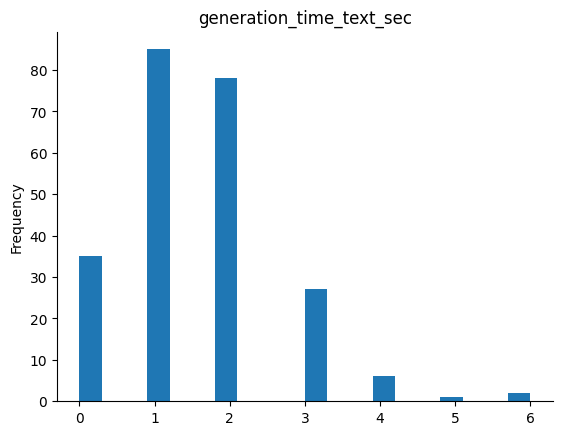

In [ ]:
# @title generation_time_text_sec

from matplotlib import pyplot as plt
data_artworks_2['generation_time_text_sec'].plot(kind='hist', bins=20, title='generation_time_text_sec')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data_routes_2[data_routes_2['user_description'] == '21']['user_query']

,user_query
28,Природа
29,Природу хочу


Ответы на вопросы - 2 этап

In [ ]:
generated_answers = pd.read_csv('/content/данные/generated_answers.csv')
generated_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8 non-null      int64  
 1   session_id                 8 non-null      object 
 2   user_question              8 non-null      object 
 3   user_description           8 non-null      object 
 4   artwork                    8 non-null      object 
 5   generated_answer           8 non-null      object 
 6   voice_filename             4 non-null      object 
 7   generation_time_text_sec   4 non-null      float64
 8   generation_time_audio_sec  4 non-null      float64
 9   created_at                 8 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 772.0+ bytes


In [ ]:
generated_answers.head(9)

,id,session_id,user_question,user_description,artwork,generated_answer,voice_filename,generation_time_text_sec,generation_time_audio_sec,created_at
0,1,1ce63237-ec3a-4f10-8560-12bf0a86b43e,Как дела,Ажйжаужп,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,"К сожалению, я затрудняюсь ответить. Пожалуйст...",NaN,NaN,NaN,2025-05-13 11:37:51.537
1,2,82e53b90-887a-45b3-aa49-5e7053f4381c,Далее,"Мне 41 год, увлекаюсь бегом и чтением книг. Лю...","Кристина Бабина\n«Свет мой, зеркальце, скажи…»","К сожалению, я затрудняюсь ответить. Пожалуйст...",NaN,NaN,NaN,2025-05-16 16:37:37.142
2,3,f66865a9-3ee4-4dd8-975b-01541c5bda32,Где еще выставлялась эта работа,43 искусство интересно,"Саша Мельникова\n""Вол в неоновом цвете луны""",Эта работа была представлена на персональных в...,voice.ogg,1.0,3.0,2025-05-17 12:33:31.197
3,4,378ee29c-c164-4c14-8d8b-e823870cf263,Васильева исток,28\nЛюблю фэнтези\nЛюбопытство,Ксения Баданова\n«Портал»,"К сожалению, я затрудняюсь ответить. Пожалуйст...",NaN,NaN,NaN,2025-05-17 13:06:02.718
4,5,9700ddad-0786-467c-a0a1-f46292697934,Что это такое?,Привет,"Rose Asрho\n«Может, чаю?»","Это инсталляция под названием Может, чаю, созд...",voice.ogg,1.0,6.0,2025-05-17 13:40:57.877
5,6,1a9e0a2b-4496-4780-945d-e61d9e06ef94,"Опиши, как выглядит картину визуально",21,"Эльвира Хусаинова \n«Там, только там»","Картина Эльвиры Хусайновой Там, только там пре...",voice.ogg,1.0,13.0,2025-05-17 14:47:37.355
6,7,ab7704dd-6d8a-48d5-898d-d9e7211dce73,А про картину то че скажешь епт,Я педик,Команда «ДАЙТЕ СТЕНУ»\n«Чьи цветы»,"К сожалению, я затрудняюсь ответить. Пожалуйст...",NaN,NaN,NaN,2025-05-17 15:29:29.463
7,8,ab7704dd-6d8a-48d5-898d-d9e7211dce73,Расскажи про саму картину что-нибудь,Я педик,Команда «ДАЙТЕ СТЕНУ»\n«Чьи цветы»,Картина ДАЙТЕ СТЕНУ создана командой художнико...,voice.ogg,1.0,3.0,2025-05-17 15:29:46.956


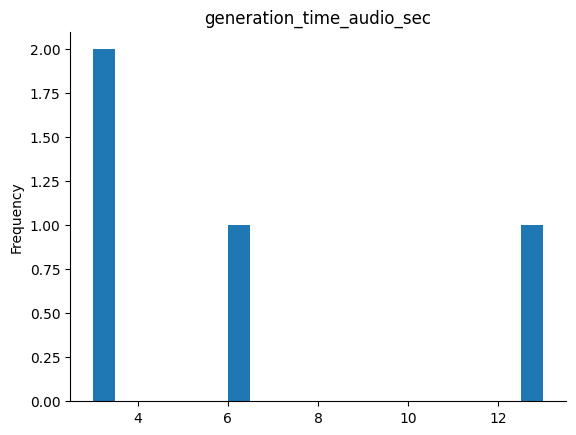

In [ ]:
# @title generation_time_audio_sec

from matplotlib import pyplot as plt
generated_answers['generation_time_audio_sec'].plot(kind='hist', bins=20, title='generation_time_audio_sec')
plt.gca().spines[['top', 'right',]].set_visible(False)

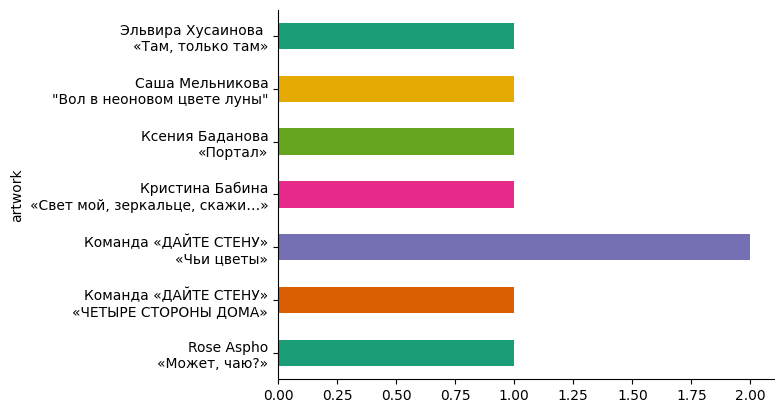

In [ ]:
# @title artwork

from matplotlib import pyplot as plt
import seaborn as sns
generated_answers.groupby('artwork').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

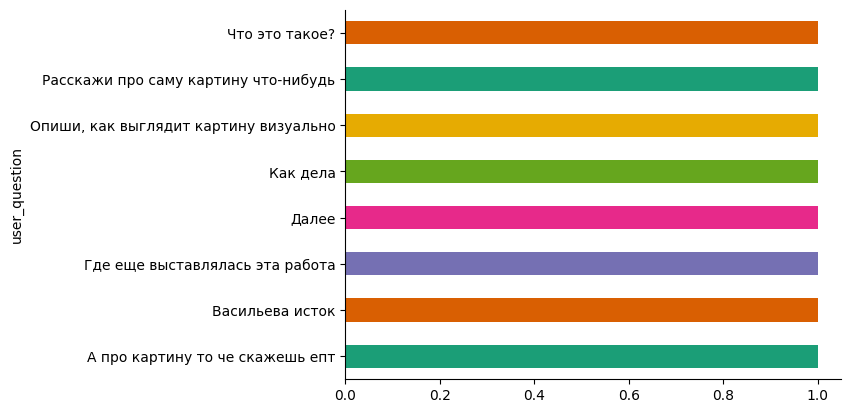

In [ ]:
# @title user_question

from matplotlib import pyplot as plt
import seaborn as sns
generated_answers.groupby('user_question').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Метрики качества генерации - подготовка данных

Для описаний экспонатов

In [ ]:
data_artworks_2 = pd.read_csv('/content/данные/generated_artwork_info.csv')
data_artworks_1 = pd.read_csv('/content/generated_artwork_info_202505261153.csv')

In [ ]:
data_artworks_2.info()
print('-'*100)
data_artworks_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         234 non-null    int64 
 1   session_id                 234 non-null    object
 2   artwork                    234 non-null    object
 3   user_description           234 non-null    object
 4   generated_text             234 non-null    object
 5   voice_filename             234 non-null    object
 6   generation_time_text_sec   234 non-null    int64 
 7   generation_time_audio_sec  234 non-null    int64 
 8   created_at                 234 non-null    object
dtypes: int64(3), object(6)
memory usage: 16.6+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column                     Non-N

In [ ]:
df1_filtered = data_artworks_2[['artwork', 'user_description', 'generated_text']]
df2_filtered = data_artworks_1[['artwork', 'user_description', 'generated_text']]

# Объединяем
merged_artwork_info = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

# Проверка результата
print(merged_artwork_info.shape)
merged_artwork_info.info()

(331, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   artwork           331 non-null    object
 1   user_description  331 non-null    object
 2   generated_text    331 non-null    object
dtypes: object(3)
memory usage: 7.9+ KB


In [ ]:
merged_artwork_info.to_csv('merged_artwork_info.csv', index=False)

In [ ]:
merged_artwork_info.head()

,artwork,user_description,generated_text
0,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Ажйжаужп,Эта экскурсия по галерее погружает вас в мир с...
1,Гатауллина Диана\n\nТриптих “Под Никольским мо...,Привет! \nЯ люблю живопись и музыку \nМне 45 лет,Диана Гатауллина приглашает вас в путешествие ...
2,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Люблю искусство. Учусь в художественной школе,**Первая сторона**\n\nАлександр Кузьмин создае...
3,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Люблю искусство. Учусь в художественной школе,"Представьте себе дом, но не обычный, а созданн..."
4,Юлия Эдуардовна Миллер\n«Наследили»,Как дела?,Инсталляция Юлии Эдуардовны «Наследили» предст...


In [ ]:
final_artwork_df = final_artwork_df.merge(data_museum[['name', 'short_description']], left_on='artwork', right_on='name', how='left')

In [ ]:
final_artwork_df.drop(columns='name_y', inplace=True)

In [ ]:
final_artwork_df

,artwork,user_description,generated_text,text,short_description
0,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Ажйжаужп,Эта экскурсия по галерее погружает вас в мир с...,"«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис...","«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис..."
1,Гатауллина Диана\n\nТриптих “Под Никольским мо...,Привет! \nЯ люблю живопись и музыку \nМне 45 лет,Диана Гатауллина приглашает вас в путешествие ...,Гатауллина Диана / mojno.prosto.di \n\nТриптих...,Гатауллина Диана\nmojno.prosto.di \n\nТриптих ...
2,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Люблю искусство. Учусь в художественной школе,**Первая сторона**\n\nАлександр Кузьмин создае...,"«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис...","«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис..."
3,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,Люблю искусство. Учусь в художественной школе,"Представьте себе дом, но не обычный, а созданн...","«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис...","«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис..."
4,Юлия Эдуардовна Миллер\n«Наследили»,Как дела?,Инсталляция Юлии Эдуардовны «Наследили» предст...,Юлия Эдуардовна \n«Наследили»\n\nИнсталляция ...,Юлия Эдуардовна \n«Наследили»\n\nИнсталляция ...
...,...,...,...,...,...
326,Диана Окаева\n«Дома лучше. Карта значимых мест»,12\nСпортом \nЛюбопытство,Диана Окаева\n«Дома лучше. Карта значимых мест...,Диана Окаева\n«Дома лучше. Карта значимых мест...,Диана Окаева\n«Дома лучше. Карта значимых мест...
327,"Василий Кирилов\n""Осень""",50 лет,"ВАСИЛИЙ КИРИЛЛОВ\nВыпускник ТГУ, молодой худож...","ВАСИЛИЙ КИРИЛЛОВ\nВыпускник ТГУ, молодой худож...","ВАСИЛИЙ КИРИЛЛОВ\nВыпускник ТГУ, молодой худож..."
328,Команда «ДАЙТЕ СТЕНУ»\n«Типсы»,50 лет,Эта группа художников из Тюмени объединилась д...,"«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис...","«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис..."
329,"Василий Кирилов\n""Автопортрет 2""",50 лет,"ВАСИЛИЙ КИРИЛЛОВ\nВыпускник ТГУ, молодой худож...","ВАСИЛИЙ КИРИЛЛОВ\nВыпускник ТГУ, молодой худож...","ВАСИЛИЙ КИРИЛЛОВ\nВыпускник ТГУ, молодой худож..."


In [ ]:
final_artwork_df.to_csv('final_artwork_df.csv', index=False)

Для QA

In [ ]:
data_QA_2 = pd.read_csv('/content/данные/generated_answers.csv')
data_QA_1 =  pd.read_csv('/content/generated_answers_202505261153.csv')

In [ ]:
data_QA_2.info()
print('-'*100)
data_QA_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8 non-null      int64  
 1   session_id                 8 non-null      object 
 2   user_question              8 non-null      object 
 3   user_description           8 non-null      object 
 4   artwork                    8 non-null      object 
 5   generated_answer           8 non-null      object 
 6   voice_filename             4 non-null      object 
 7   generation_time_text_sec   4 non-null      float64
 8   generation_time_audio_sec  4 non-null      float64
 9   created_at                 8 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 772.0+ bytes
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entrie

In [ ]:
df1_filtered = data_QA_2[['user_question', 'user_description', 'artwork', 'generated_answer']]
df2_filtered = data_QA_1[['user_question', 'user_description', 'artwork', 'generated_answer']]

# Объединяем
merged_QA = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

# Проверка результата
print(merged_artwork_info.shape)
merged_QA.info()

(65, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_question     65 non-null     object
 1   user_description  65 non-null     object
 2   artwork           65 non-null     object
 3   generated_answer  65 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


In [ ]:
merged_QA.to_csv('merged_QA.csv', index=False)

In [ ]:
merged_QA.head()

,user_question,user_description,artwork,generated_answer
0,Как дела,Ажйжаужп,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,"К сожалению, я затрудняюсь ответить. Пожалуйст..."
1,Далее,"Мне 41 год, увлекаюсь бегом и чтением книг. Лю...","Кристина Бабина\n«Свет мой, зеркальце, скажи…»","К сожалению, я затрудняюсь ответить. Пожалуйст..."
2,Где еще выставлялась эта работа,43 искусство интересно,"Саша Мельникова\n""Вол в неоновом цвете луны""",Эта работа была представлена на персональных в...
3,Васильева исток,28\nЛюблю фэнтези\nЛюбопытство,Ксения Баданова\n«Портал»,"К сожалению, я затрудняюсь ответить. Пожалуйст..."
4,Что это такое?,Привет,"Rose Asрho\n«Может, чаю?»","Это инсталляция под названием Может, чаю, созд..."


In [ ]:
data_museum = pd.read_parquet('/content/Slovcova.parquet')
data_museum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               45 non-null     object
 1   title              45 non-null     object
 2   text               45 non-null     object
 3   short_description  45 non-null     object
 4   nodes              45 non-null     object
 5   image              45 non-null     object
 6   embeddings         45 non-null     object
dtypes: object(7)
memory usage: 2.6+ KB


In [ ]:
# Объединяем по совпадению artwork ↔ name
final_QA_df = final_QA_df.merge(data_museum[['name', 'text']], left_on='artwork', right_on='name', how='left')


In [ ]:
final_QA_df.drop(columns='name_y', inplace=True)

In [ ]:
final_QA_df.head()

,user_question,user_description,artwork,generated_answer,short_description,text
0,Как дела,Ажйжаужп,Команда «ДАЙТЕ СТЕНУ»\n«ЧЕТЫРЕ СТОРОНЫ ДОМА»,"К сожалению, я затрудняюсь ответить. Пожалуйст...","«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис...","«ДАЙТЕ СТЕНУ»\nКоманда художников, стрит-артис..."
1,Далее,"Мне 41 год, увлекаюсь бегом и чтением книг. Лю...","Кристина Бабина\n«Свет мой, зеркальце, скажи…»","К сожалению, я затрудняюсь ответить. Пожалуйст...","Кристина Бабина\n«Свет мой, зеркальце, скажи…»...","Кристина Бабина\n«Свет мой, зеркальце, скажи…»..."
2,Где еще выставлялась эта работа,43 искусство интересно,"Саша Мельникова\n""Вол в неоновом цвете луны""",Эта работа была представлена на персональных в...,САША МЕЛЬНИКОВА\nМультисдисциплинарный художни...,САША МЕЛЬНИКОВА\nМультисдисциплинарный художни...
3,Васильева исток,28\nЛюблю фэнтези\nЛюбопытство,Ксения Баданова\n«Портал»,"К сожалению, я затрудняюсь ответить. Пожалуйст...",Ксения Баданова\n«Портал»\nВидео-арт\n2024\nВ ...,Ксения Баданова\n«Портал»\nВидео-арт\n2024\nВ ...
4,Что это такое?,Привет,"Rose Asрho\n«Может, чаю?»","Это инсталляция под названием Может, чаю, созд...","Rose Asрho\n«Может, чаю?»\n\nИнсталляция\n2024...","Rose Asрho\n«Может, чаю?»\n\nИнсталляция\n2024..."


In [ ]:
final_QA_df.to_csv('final_QA_df.csv', index=False)

###Метрики качества генерации - вычисления

In [ ]:
!pip install rouge
!pip install rouge-score nltk

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=7182545e0d8d9d78c68e01ae66eaf5a1fb8283b99ba1adf085ec9a2776a4518f
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from rouge import Rouge
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Функция для вычисления ROUGE
def compute_rouge(reference, hypothesis):
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    return scores[0]  # Возвращаем только первую метрику из списка

# Функция для вычисления BLEU
def compute_bleu(reference, hypothesis):
    reference_tokens = reference.split()
    hypothesis_tokens = hypothesis.split()
    smoothing = SmoothingFunction().method1
    bleu_score = sentence_bleu([reference_tokens], hypothesis_tokens, smoothing_function=smoothing)
    return bleu_score

In [ ]:
# Предположим, твой финальный DataFrame называется final_artwork_df
# И он содержит колонки: 'generated_text' и 'text' (эталон)
df_eval_artworks = final_artwork_df.dropna(subset=['text', 'generated_text'])
rouge_scores = []
bleu_scores = []

for _, row in df_eval_artworks.iterrows():
    reference = str(row['text'])            # золотой эталон
    hypothesis = str(row['generated_text']) # сгенерированный текст

    if reference.strip() and hypothesis.strip():  # Пропускаем пустые строки
        rouge_result = compute_rouge(reference, hypothesis)
        bleu_result = compute_bleu(reference, hypothesis)

        rouge_scores.append(rouge_result)
        bleu_scores.append(bleu_result)


In [ ]:
import numpy as np

# Среднее по метрикам ROUGE
avg_rouge_1_f1 = np.mean([score['rouge-1']['f'] for score in rouge_scores])
avg_rouge_2_f1 = np.mean([score['rouge-2']['f'] for score in rouge_scores])
avg_rouge_l_f1 = np.mean([score['rouge-l']['f'] for score in rouge_scores])

# Среднее по BLEU
avg_bleu = np.mean(bleu_scores)

# Вывод
print("ROUGE-1 (F1):", round(avg_rouge_1_f1, 4))
print("ROUGE-2 (F1):", round(avg_rouge_2_f1, 4))
print("ROUGE-L (F1):", round(avg_rouge_l_f1, 4))
print("BLEU:", round(avg_bleu, 4))


ROUGE-1 (F1): 0.3461
ROUGE-2 (F1): 0.2769
ROUGE-L (F1): 0.3424
BLEU: 0.2434


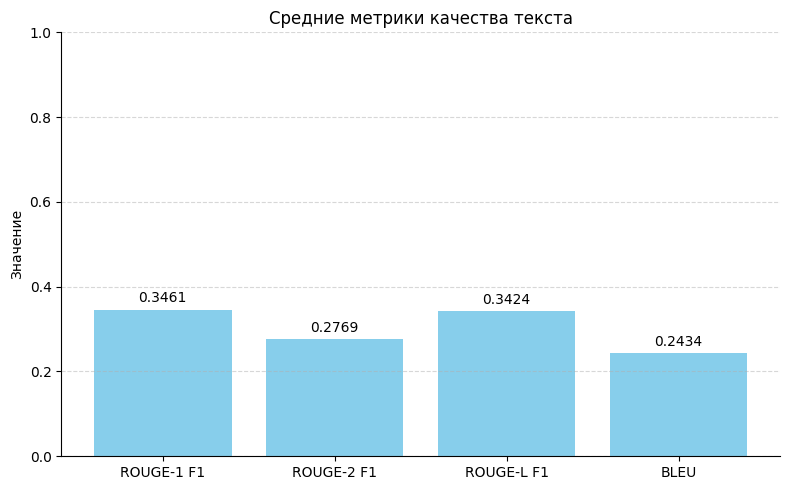

In [ ]:
import matplotlib.pyplot as plt

# Названия метрик и их значения
metric_names = ['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'BLEU']
metric_values = [
    avg_rouge_1_f1,
    avg_rouge_2_f1,
    avg_rouge_l_f1,
    avg_bleu
]

# Построение графика
plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color='skyblue')

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}', ha='center', va='bottom')

# Оформление
plt.ylim(0, 1)
plt.title('Средние метрики качества текста')
plt.ylabel('Значение')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


По short_description

In [ ]:
# Предположим, твой финальный DataFrame называется final_artwork_df
# И он содержит колонки: 'generated_text' и 'text' (эталон)
df_eval_artworks_short = final_artwork_df.dropna(subset=['short_description', 'generated_text'])
rouge_scores = []
bleu_scores = []

for _, row in df_eval_artworks_short.iterrows():
    reference = str(row['short_description'])            # золотой эталон
    hypothesis = str(row['generated_text']) # сгенерированный текст

    if reference.strip() and hypothesis.strip():  # Пропускаем пустые строки
        rouge_result = compute_rouge(reference, hypothesis)
        bleu_result = compute_bleu(reference, hypothesis)

        rouge_scores.append(rouge_result)
        bleu_scores.append(bleu_result)


NameError: name 'final_artwork_df' is not defined

In [ ]:
import numpy as np

# Среднее по метрикам ROUGE
avg_rouge_1_f1 = np.mean([score['rouge-1']['f'] for score in rouge_scores])
avg_rouge_2_f1 = np.mean([score['rouge-2']['f'] for score in rouge_scores])
avg_rouge_l_f1 = np.mean([score['rouge-l']['f'] for score in rouge_scores])

# Среднее по BLEU
avg_bleu = np.mean(bleu_scores)

# Вывод
print("ROUGE-1 (F1):", round(avg_rouge_1_f1, 4))
print("ROUGE-2 (F1):", round(avg_rouge_2_f1, 4))
print("ROUGE-L (F1):", round(avg_rouge_l_f1, 4))
print("BLEU:", round(avg_bleu, 4))


ROUGE-1 (F1): 0.3838
ROUGE-2 (F1): 0.3053
ROUGE-L (F1): 0.3791
BLEU: 0.2887


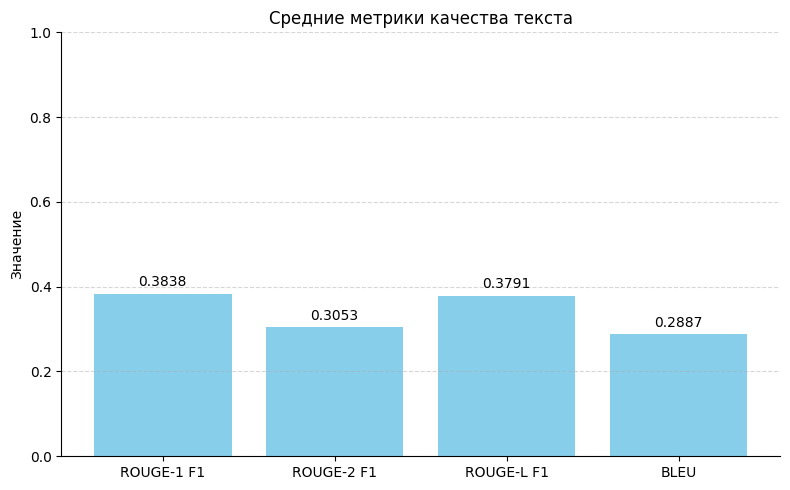

In [ ]:
# Названия метрик и их значения
metric_names = ['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'BLEU']
metric_values = [
    avg_rouge_1_f1,
    avg_rouge_2_f1,
    avg_rouge_l_f1,
    avg_bleu
]

# Построение графика
plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color='skyblue')

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}', ha='center', va='bottom')

# Оформление
plt.ylim(0, 1)
plt.title('Средние метрики качества текста')
plt.ylabel('Значение')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


Для вопросов на ответы с полным текстом

In [ ]:
df_eval_QA_short = final_QA_df.dropna(subset=['text', 'generated_answer'])
rouge_scores = []
bleu_scores = []

for _, row in df_eval_QA_short.iterrows():
    reference = str(row['text'])            # золотой эталон
    hypothesis = str(row['generated_answer']) # сгенерированный текст

    if reference.strip() and hypothesis.strip():  # Пропускаем пустые строки
        rouge_result = compute_rouge(reference, hypothesis)
        bleu_result = compute_bleu(reference, hypothesis)

        rouge_scores.append(rouge_result)
        bleu_scores.append(bleu_result)

In [ ]:
avg_rouge_1_f1 = np.mean([score['rouge-1']['f'] for score in rouge_scores])
avg_rouge_2_f1 = np.mean([score['rouge-2']['f'] for score in rouge_scores])
avg_rouge_l_f1 = np.mean([score['rouge-l']['f'] for score in rouge_scores])

# Среднее по BLEU
avg_bleu = np.mean(bleu_scores)

# Вывод
print("ROUGE-1 (F1):", round(avg_rouge_1_f1, 4))
print("ROUGE-2 (F1):", round(avg_rouge_2_f1, 4))
print("ROUGE-L (F1):", round(avg_rouge_l_f1, 4))
print("BLEU:", round(avg_bleu, 4))

ROUGE-1 (F1): 0.0533
ROUGE-2 (F1): 0.0095
ROUGE-L (F1): 0.0512
BLEU: 0.0012


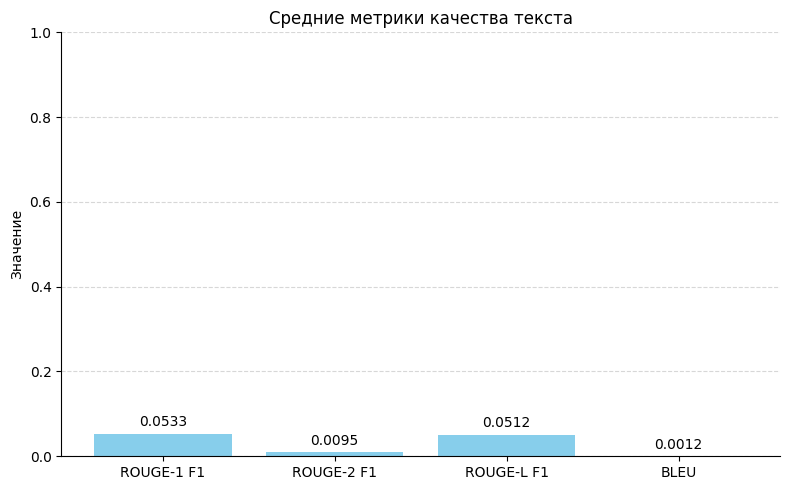

In [ ]:
metric_names = ['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'BLEU']
metric_values = [
    avg_rouge_1_f1,
    avg_rouge_2_f1,
    avg_rouge_l_f1,
    avg_bleu
]

# Построение графика
plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color='skyblue')

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}', ha='center', va='bottom')

# Оформление
plt.ylim(0, 1)
plt.title('Средние метрики качества текста')
plt.ylabel('Значение')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

Для ответа на вопросы

In [ ]:
df_eval_QA_short = final_QA_df.dropna(subset=['short_description', 'generated_answer'])
rouge_scores = []
bleu_scores = []

for _, row in df_eval_QA_short.iterrows():
    reference = str(row['short_description'])            # золотой эталон
    hypothesis = str(row['generated_answer']) # сгенерированный текст

    if reference.strip() and hypothesis.strip():  # Пропускаем пустые строки
        rouge_result = compute_rouge(reference, hypothesis)
        bleu_result = compute_bleu(reference, hypothesis)

        rouge_scores.append(rouge_result)
        bleu_scores.append(bleu_result)

In [ ]:
avg_rouge_1_f1 = np.mean([score['rouge-1']['f'] for score in rouge_scores])
avg_rouge_2_f1 = np.mean([score['rouge-2']['f'] for score in rouge_scores])
avg_rouge_l_f1 = np.mean([score['rouge-l']['f'] for score in rouge_scores])

# Среднее по BLEU
avg_bleu = np.mean(bleu_scores)

# Вывод
print("ROUGE-1 (F1):", round(avg_rouge_1_f1, 4))
print("ROUGE-2 (F1):", round(avg_rouge_2_f1, 4))
print("ROUGE-L (F1):", round(avg_rouge_l_f1, 4))
print("BLEU:", round(avg_bleu, 4))

ROUGE-1 (F1): 0.0647
ROUGE-2 (F1): 0.0127
ROUGE-L (F1): 0.0623
BLEU: 0.0028


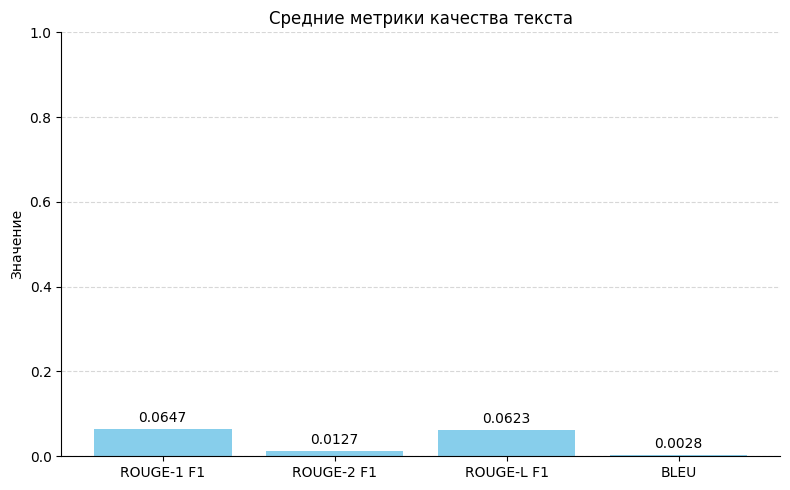

In [ ]:
metric_names = ['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'BLEU']
metric_values = [
    avg_rouge_1_f1,
    avg_rouge_2_f1,
    avg_rouge_l_f1,
    avg_bleu
]

# Построение графика
plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metric_values, color='skyblue')

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}', ha='center', va='bottom')

# Оформление
plt.ylim(0, 1)
plt.title('Средние метрики качества текста')
plt.ylabel('Значение')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

bert-score для описаний

In [ ]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import pandas as pd
final_artwork_df = pd.read_csv('/content/final_artwork_df.csv')
final_QA_df = pd.read_csv('/content/final_QA_df.csv')

In [ ]:
from bert_score import score
import numpy as np
# Фильтрация пустых значений
df_eval = final_artwork_df.dropna(subset=['text', 'generated_text'])

# Списки текстов
references = df_eval['text'].astype(str).tolist()
candidates = df_eval['generated_text'].astype(str).tolist()
P, R, F1 = score(candidates, references, lang="ru")  # или "en", если тексты на английском

print(f"BERTScore Precision:  {P.mean():.4f}")
print(f"BERTScore Recall:     {R.mean():.4f}")
print(f"BERTScore F1-score:   {F1.mean():.4f}")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

BERTScore Precision:  0.7944
BERTScore Recall:     0.7480
BERTScore F1-score:   0.7700


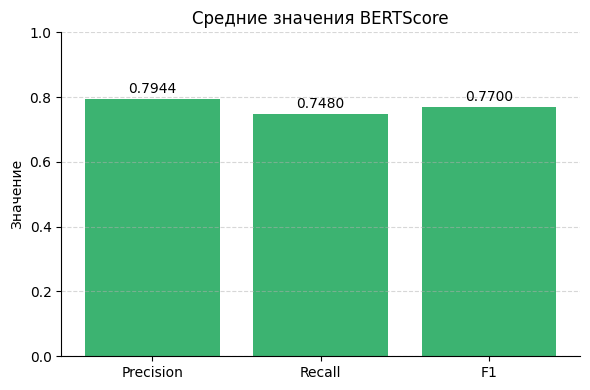

In [ ]:
import matplotlib.pyplot as plt

# Значения метрик
metric_names = ['Precision', 'Recall', 'F1']
metric_values = [P.mean(), R.mean(), F1.mean()]

plt.figure(figsize=(6, 4))
bars = plt.bar(metric_names, metric_values, color='mediumseagreen')
plt.title('Средние значения BERTScore')
plt.ylim(0, 1)
plt.ylabel('Значение')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

# Добавим подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



Для описаний с short_description

In [ ]:
df_eval_artwork_short = final_artwork_df.dropna(subset=['short_description', 'generated_text'])

# Списки текстов
references = df_eval_artwork_short['short_description'].astype(str).tolist()
candidates = df_eval_artwork_short['generated_text'].astype(str).tolist()
P, R, F1 = score(candidates, references, lang="ru")  # или "en", если тексты на английском

print(f"BERTScore Precision:  {P.mean():.4f}")
print(f"BERTScore Recall:     {R.mean():.4f}")
print(f"BERTScore F1-score:   {F1.mean():.4f}")



BERTScore Precision:  0.8010
BERTScore Recall:     0.7764
BERTScore F1-score:   0.7881


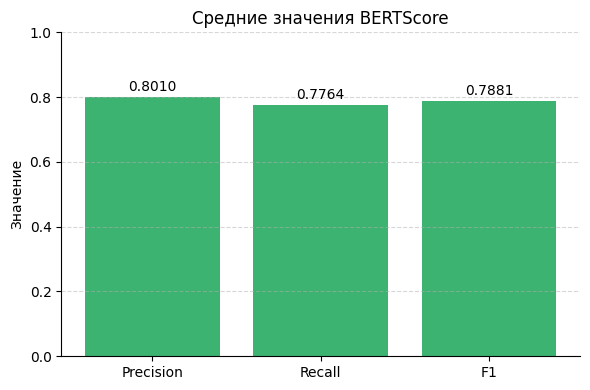

In [ ]:
metric_names = ['Precision', 'Recall', 'F1']
metric_values = [P.mean(), R.mean(), F1.mean()]

plt.figure(figsize=(6, 4))
bars = plt.bar(metric_names, metric_values, color='mediumseagreen')
plt.title('Средние значения BERTScore')
plt.ylim(0, 1)
plt.ylabel('Значение')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

# Добавим подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Для ответов на вопросы с text

In [ ]:
df_eval_QA_text = final_QA_df.dropna(subset=['text', 'generated_answer'])

# Списки текстов
references = df_eval_QA_text['text'].astype(str).tolist()
candidates = df_eval_QA_text['generated_answer'].astype(str).tolist()
P, R, F1 = score(candidates, references, lang="ru")  # или "en", если тексты на английском

print(f"BERTScore Precision:  {P.mean():.4f}")
print(f"BERTScore Recall:     {R.mean():.4f}")
print(f"BERTScore F1-score:   {F1.mean():.4f}")



BERTScore Precision:  0.6541
BERTScore Recall:     0.5783
BERTScore F1-score:   0.6133


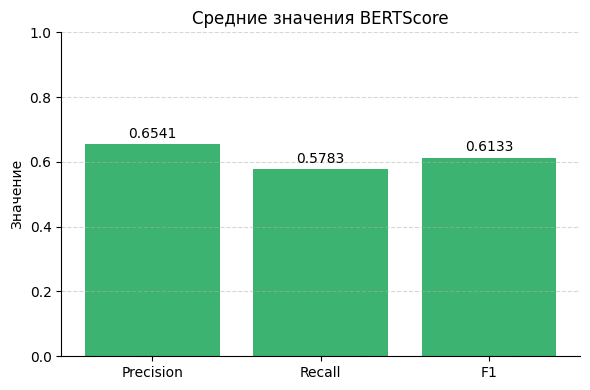

In [ ]:
metric_names = ['Precision', 'Recall', 'F1']
metric_values = [P.mean(), R.mean(), F1.mean()]

plt.figure(figsize=(6, 4))
bars = plt.bar(metric_names, metric_values, color='mediumseagreen')
plt.title('Средние значения BERTScore')
plt.ylim(0, 1)
plt.ylabel('Значение')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

# Добавим подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Для ответов с short_description

In [ ]:
df_eval_QA_short = final_QA_df.dropna(subset=['short_description', 'generated_answer'])

# Списки текстов
references = df_eval_QA_short['short_description'].astype(str).tolist()
candidates = df_eval_QA_short['generated_answer'].astype(str).tolist()
P, R, F1 = score(candidates, references, lang="ru")  # или "en", если тексты на английском

print(f"BERTScore Precision:  {P.mean():.4f}")
print(f"BERTScore Recall:     {R.mean():.4f}")
print(f"BERTScore F1-score:   {F1.mean():.4f}")

BERTScore Precision:  0.6593
BERTScore Recall:     0.5875
BERTScore F1-score:   0.6206


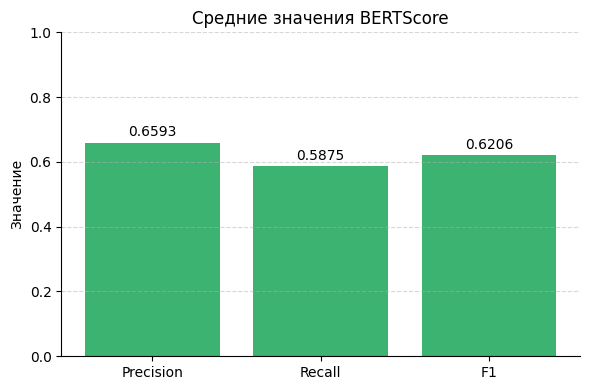

In [ ]:
metric_names = ['Precision', 'Recall', 'F1']
metric_values = [P.mean(), R.mean(), F1.mean()]

plt.figure(figsize=(6, 4))
bars = plt.bar(metric_names, metric_values, color='mediumseagreen')
plt.title('Средние значения BERTScore')
plt.ylim(0, 1)
plt.ylabel('Значение')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

# Добавим подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
